In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
runs = {
    "Sputum" : "/home/selezov_su/Proteomics/Viruses/SearchPeptidesInSputum/combined/txt/",
    "Smears" : "/home/selezov_su/Proteomics/Viruses/Smears/combined/txt/",
    "DBS"    : "/home/selezov_su/Proteomics/DryBloodSample/combined/txt/",
}

data_path = runs["DBS"]

In [3]:
proteins = pd.read_csv(data_path + "proteinGroups.txt", sep="\t").set_index("Majority protein IDs")

In [4]:
human = proteins.loc[~proteins.index.str.contains("CON")]
human.index = human.index.map(lambda x: x.split(";")[0].split("|")[1])

In [5]:
## CHOOSE QUANTIFICATION METHOD
values = human[[i for i in human.columns if i.find("iBAQ") > -1 ][2:]].dropna(axis=0).T
values.index = [int(i.strip("iBAQ ")) for i in values.index]
values = values.sort_index()

In [6]:
values

Majority protein IDs,P01624,A0A075B6I0,A0A075B6J9,P01615,A0A0C4DH68,A0A0C4DH67,A0A087WSY6,P04433,A0A0A0MT36,A0A0B4J1X5,...,Q9ULM6,Q9UNS2,Q9UNZ2,Q9UPN7,Q9UQ80,Q9Y2V2,Q9Y3I1,Q9Y490,Q9Y4E8,Q9Y570
1,155060000.0,0.0,0.0,367040000.0,29419000.0,0.0,4618300.0,137690000.0,0.0,35790000.0,...,9486600.0,1718800.0,0.0,0.0,5248100.0,8757500.0,6689700.0,5021800.0,132150.0,0.0
2,29702000.0,5391900.0,0.0,129960000.0,0.0,0.0,0.0,26016000.0,0.0,6397100.0,...,624570.0,0.0,13528000.0,0.0,1602000.0,35143000.0,949030.0,834880.0,0.0,813250.0
3,58821000.0,8320100.0,0.0,245500000.0,20970000.0,11239000.0,4519500.0,43935000.0,3126200.0,25221000.0,...,3278500.0,760570.0,27265000.0,759610.0,0.0,74937000.0,3049000.0,2862900.0,0.0,0.0
4,61530000.0,0.0,0.0,290630000.0,9682600.0,4813000.0,0.0,67965000.0,0.0,21273000.0,...,4637500.0,786930.0,17442000.0,408680.0,0.0,27164000.0,1547300.0,1126400.0,0.0,0.0
5,114420000.0,0.0,0.0,376400000.0,15161000.0,0.0,6382500.0,91848000.0,0.0,45660000.0,...,6706000.0,0.0,7763300.0,0.0,2647900.0,6265300.0,8158400.0,515480.0,0.0,0.0
6,124600000.0,0.0,17225000.0,289720000.0,10516000.0,5862300.0,0.0,111950000.0,0.0,45079000.0,...,7080600.0,0.0,14800000.0,671070.0,3065500.0,24524000.0,7963700.0,828350.0,0.0,0.0
7,182530000.0,0.0,0.0,377180000.0,23848000.0,7902400.0,7860400.0,129190000.0,0.0,70000000.0,...,4741700.0,0.0,11782000.0,0.0,9640900.0,25476000.0,4601500.0,921450.0,0.0,4013000.0
8,67432000.0,0.0,0.0,338640000.0,12810000.0,5179400.0,0.0,54624000.0,0.0,22050000.0,...,4203300.0,0.0,14751000.0,0.0,1822800.0,30048000.0,2508600.0,603880.0,0.0,0.0
9,84590000.0,16022000.0,13993000.0,292600000.0,9528900.0,6722100.0,0.0,83145000.0,0.0,24024000.0,...,7638900.0,613010.0,8169300.0,887950.0,0.0,23591000.0,6996400.0,332720.0,0.0,0.0
10,66427000.0,0.0,0.0,283530000.0,11014000.0,6391300.0,0.0,75892000.0,0.0,23831000.0,...,5270500.0,590920.0,4739500.0,571990.0,0.0,0.0,1319500.0,863210.0,0.0,0.0


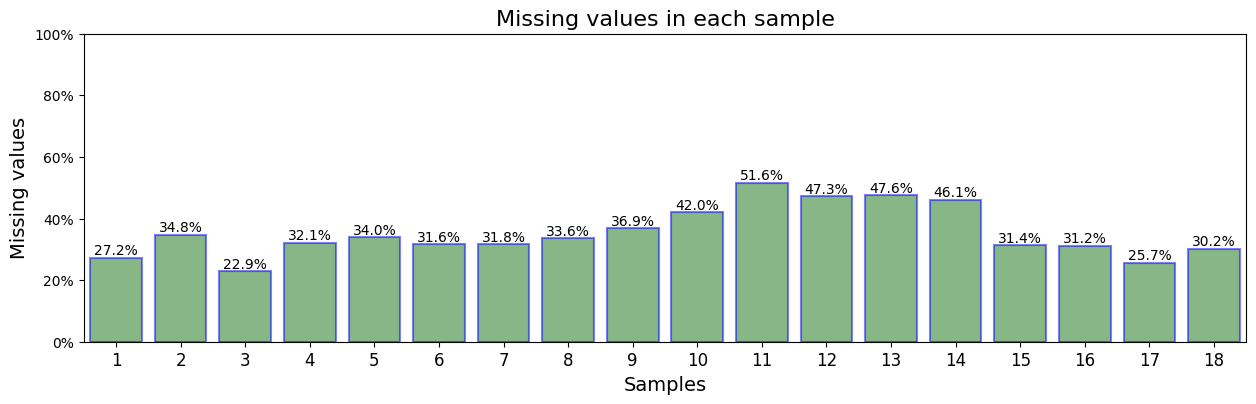

In [7]:
## MISSING DATA IN EACH SAMPLE
import matplotlib.ticker as mtick

missing = pd.DataFrame((values == 0).sum(1) / values.notna().sum(1), columns=["Missing"])

fig = plt.figure(figsize=(15,4))
plt.title("Missing values in each sample", fontsize=16)

barplot = sns.barplot(missing.T, color="green", alpha=0.5, edgecolor='b', linewidth=1.5)
barplot.bar_label(barplot.containers[0], fmt='{:,.1%}', fontsize=10)

plt.ylabel("Missing values", fontsize=14)
plt.xlabel("Samples", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
plt.ylim(0, 1)

barplot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()

<Figure size 750x750 with 0 Axes>

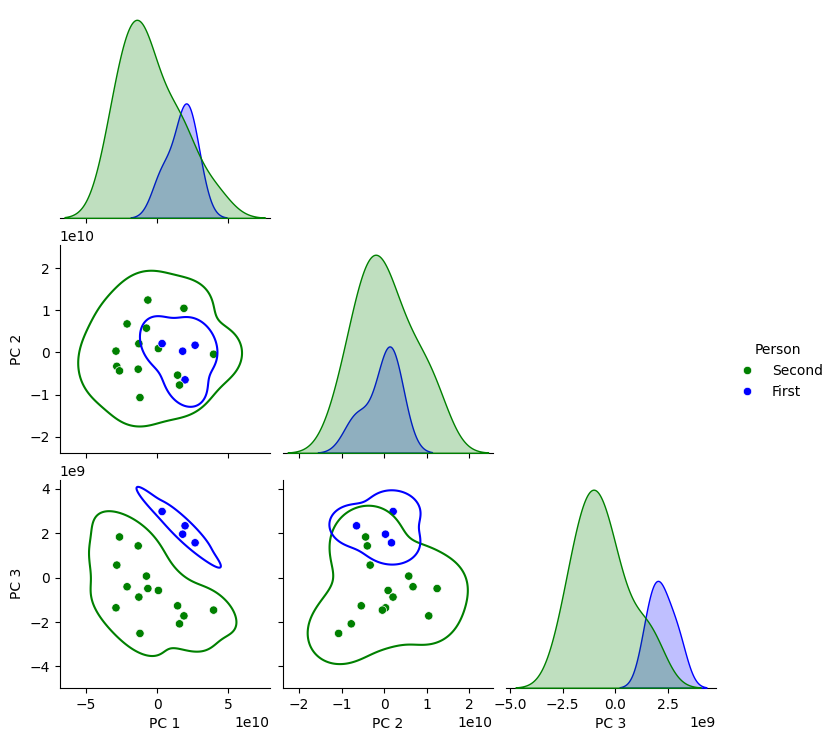

In [8]:
# RAW DATA PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
xpca = pca.fit_transform(values)    
          
x_pca = pd.DataFrame(xpca, index=values.index, columns=[F"PC {i}" for i in range(1, pca.n_components + 1)])
x_pca["Person"] = x_pca.index.map(lambda x : "First" if x in [11, 12, 13, 14] else "Second")

fig = plt.figure(figsize=(7.5, 7.5))
g = sns.pairplot(x_pca, hue="Person", palette=["green", "blue"], corner=True)
g.map_lower(sns.kdeplot, levels=1, color=".1")

plt.show()

In [9]:
## CONTAMINATION FILTERING
filtered = human.loc[~human["Taxonomy IDs"].str.contains("-1")]\
                   .loc[human["Unique peptides"] > 1]\
                       .loc[human["Reverse"] != "+"]

values = filtered[[ i for i in filtered.columns if i.find("iBAQ") > -1 ][2:]].dropna(axis=0).T
values.index = [int(i.strip("iBAQ ")) for i in values.index]
values = values.sort_index()

## DATA TRANSFORMATION

transform = np.where(values != 0, np.log10(values), np.nan)
values = pd.DataFrame(transform, index=values.index, columns=values.columns)
values = values.dropna(thresh=15, axis=1)

/home/tools/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


<Figure size 750x750 with 0 Axes>

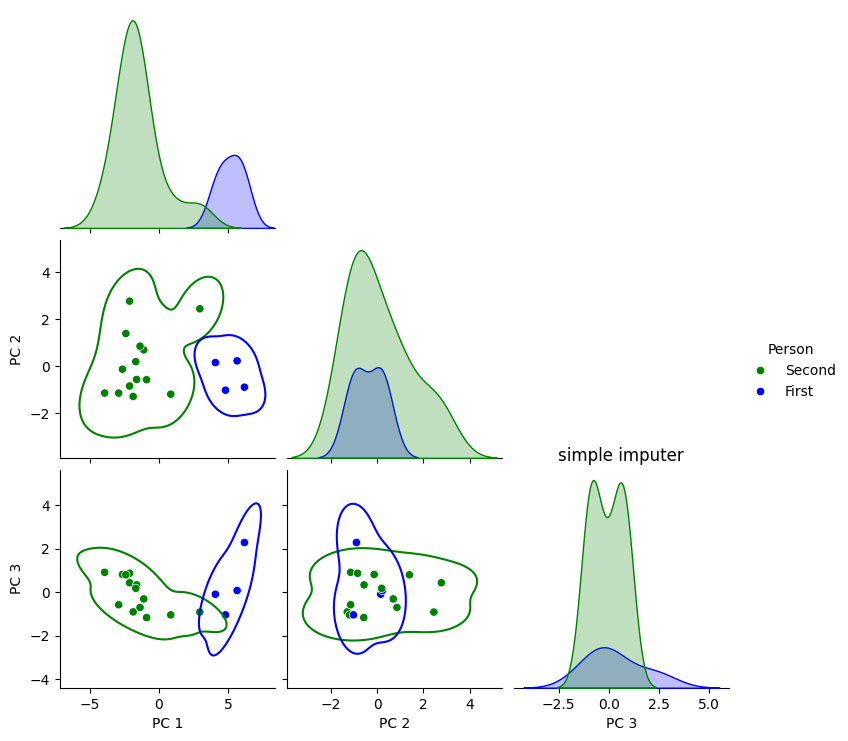

<Figure size 750x750 with 0 Axes>

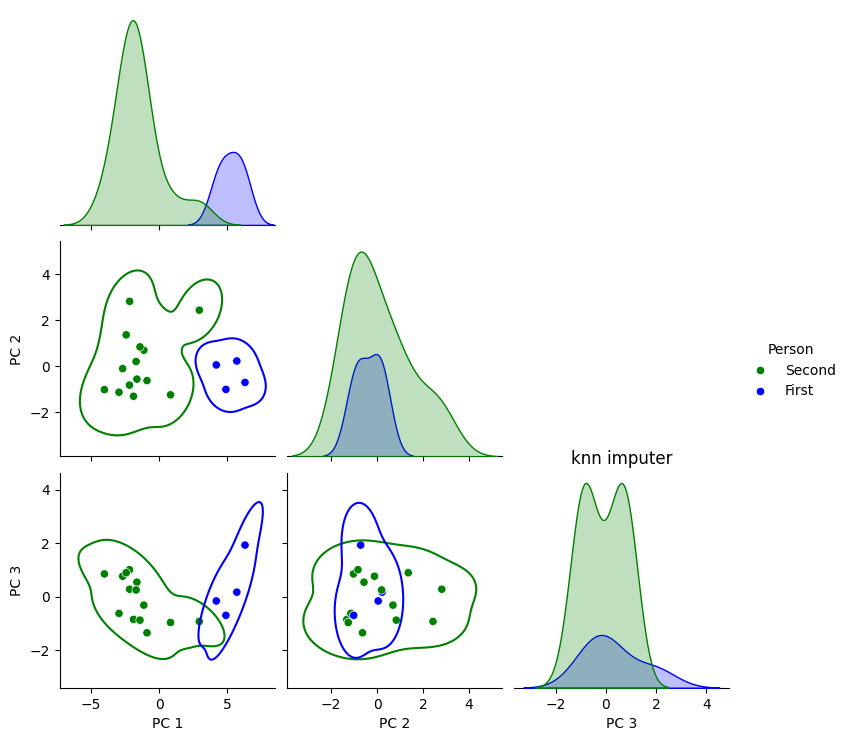

<Figure size 750x750 with 0 Axes>

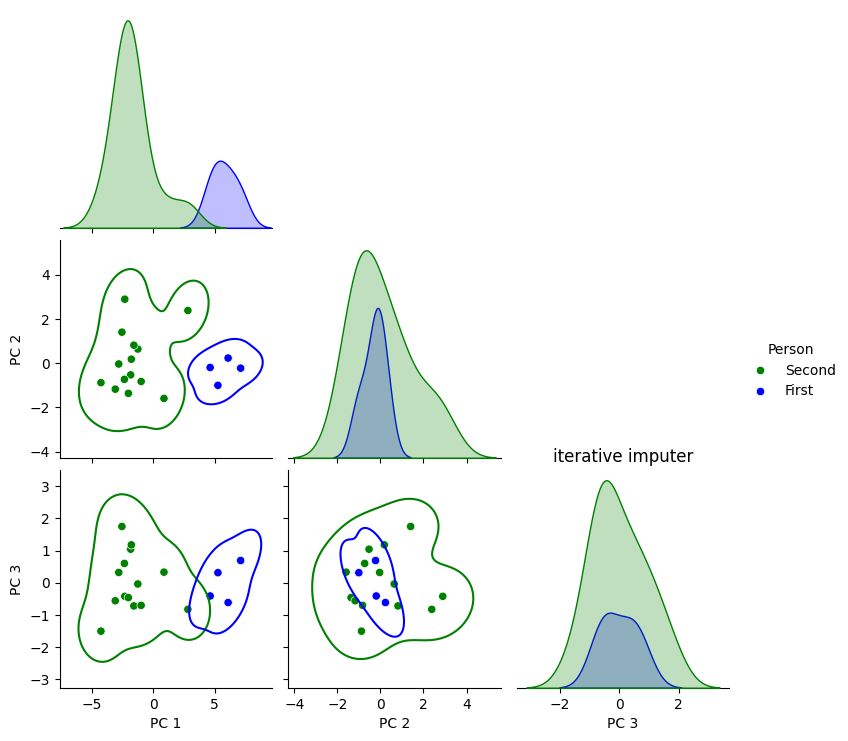

In [10]:
## MISSING VALUES IMPUTATION

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

imputers = {
    "simple"       : SimpleImputer(strategy='mean'),
    "knn"          : KNNImputer(n_neighbors=10, weights="uniform"),    
    "iterative"    : IterativeImputer(max_iter=10, min_value=values.min().min()),
}

for one in imputers.keys():
    filled = imputers[one].fit_transform(values)
    
    pca = PCA(n_components=3)
    xpca = pca.fit_transform(filled)    

    x_pca = pd.DataFrame(xpca, index=values.index, columns=[F"PC {i}" for i in range(1, pca.n_components + 1)])
    x_pca["Person"] = x_pca.index.map(lambda x : "First" if x in [11, 12, 13, 14] else "Second")

    fig = plt.figure(figsize=(7.5, 7.5))
    g = sns.pairplot(x_pca, hue="Person", palette=["green", "blue"], corner=True)
    plt.title(f"{one} imputer")
    g.map_lower(sns.kdeplot, levels=1, color=".1")

    plt.show()

In [11]:
from statsmodels.stats.multitest import multipletests as fdr
from scipy import stats

filled = imputers["iterative"].fit_transform(values)
data = pd.DataFrame(filled, index=values.index, columns=values.columns)

tuples = [("Bob" if i in [11, 12, 13, 14] else "Alice", i) for i in data.index]
data.index = pd.MultiIndex.from_tuples(tuples, names=["Person", "Sample"])

dataframe = pd.DataFrame([stats.mannwhitneyu(values["Alice"], values["Bob"]) for protein, values in data.T.iterrows()], index=data.T.index)
dataframe["fdr"] = fdr(dataframe["pvalue"], method="fdr_bh")[1]

In [13]:
dataframe.loc[dataframe.fdr <= 0.05]

,statistic,pvalue,fdr
Majority protein IDs,,,
A0A0B4J1X5,52.0,0.007843,0.011971
A0A0B4J1Y9,55.0,0.001307,0.003086
O14618,49.0,0.024837,0.033838
O14791,56.0,0.000654,0.002073
O14818,56.0,0.000654,0.002073
...,...,...,...
Q99497,53.0,0.004575,0.008147
Q9NTK5,56.0,0.000654,0.002073
Q9UL46,48.0,0.034641,0.045368


,statistic,pvalue
Majority protein IDs,,
A0A0B4J1X5,52.0,0.007843
A0A0B4J1Y9,55.0,0.001307
O14618,49.0,0.024837
O14791,56.0,0.000654
O14818,56.0,0.000654
...,...,...
Q9NTK5,56.0,0.000654
Q9UL46,48.0,0.034641
Q9UNZ2,48.0,0.034641


In [ ]:
# data["Person"] = data.index.map(lambda x : "First" if x in [11, 12, 13, 14] else "Second")
# one, two = pd.concat([data.loc[:10], data.loc[15:]], axis=0), data.loc[11:14]

# cv1 = one.apply(np.var).sort_values()
# cv2 = two.apply(np.var).sort_values().reindex(cv1.index)

# cv = pd.concat([cv1, cv2], axis=1)
# cv.columns = ["Alice", "Bob"]


# cv = cv.stack().reset_index()
# cv.columns = ["Protein", "Person", "CV"]

In [ ]:
## FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaled = scaler.fit_transform(data)

sns.kdeplot(scaled)
plt.legend("")

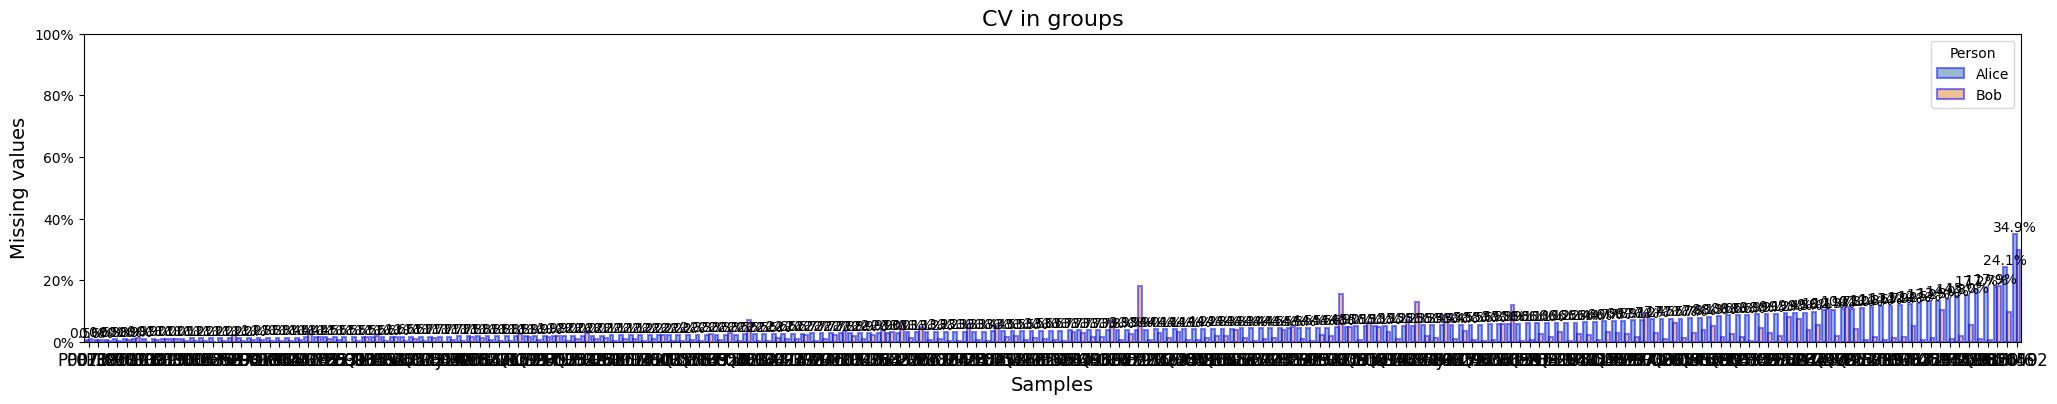

In [231]:
## CV BY PROTEIN
import matplotlib.ticker as mtick

fig = plt.figure(figsize=(25,4))
plt.title("CV in groups", fontsize=16)

barplot = sns.barplot(cv, x="Protein", y="CV", hue="Person", alpha=0.5, edgecolor='b', linewidth=1.5)
barplot.bar_label(barplot.containers[0], fmt='{:,.1%}', fontsize=10)

plt.ylabel("Missing values", fontsize=14)
plt.xlabel("Samples", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
plt.ylim(0, 1)

barplot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

In [15]:
import os
os.getcwd()

'/home/selezov_su/notebooks/Promics/Panoram'

In [16]:
atlas = pd.read_csv("../../data/normal_tissue.tsv", sep="\t").iloc[:, :-1]

In [21]:
atlas["Cell type"].value_counts().head(20)

glandular cells                 186429
squamous epithelial cells        47212
glial cells                      29061
neuronal cells                   28896
fibroblasts                      28748
endothelial cells                24563
non-germinal center cells        20085
germinal center cells            19374
cells in endometrial stroma      19319
adipocytes                       19061
respiratory epithelial cells     16164
peripheral nerve                 14053
cells in granular layer          11199
melanocytes                      10702
smooth muscle cells               9776
macrophages                       9764
cardiomyocytes                    9684
hepatocytes                       9683
Leydig cells                      9683
cells in red pulp                 9682
Name: Cell type, dtype: int64

In [20]:
atlas["Cell type"].value_counts()

Cell type
glandular cells              186429
squamous epithelial cells     47212
glial cells                   29061
neuronal cells                28896
fibroblasts                   28748
                              ...  
lactating glandular cells         8
ductal cells                      7
cells in posterior                5
ependymal cells                   3
cells in dentate nucleus          3
Name: count, Length: 144, dtype: int64